# EDA para análise de risco financeiro

João Victor Amato Spadão

---

Este documento apresenta o desenvolvimento de uma análise exploratória de dados (EDA) de uma base com objetivo de analisar risco financeiro com base em algumas informações fornecidas


In [44]:
#Iniciamos com a importação das bibliotecas de manipulação e visualização de dados
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
#Carregamos a base fornecida e exibimos as informações básicas com as funções head(), info() e describe()
df = pd.read_csv("df_criado_final (1).csv")

In [46]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,N,NaN,NaN,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,N,NaN,NaN,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,N,NaN,NaN,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,N,NaN,NaN,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,N,NaN,NaN,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [48]:
df.describe()

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,21843.000000,12806.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,3.503354,31.724529,2.104931,1.241605,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,2.132091,8.565117,0.898459,0.496176,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,1.000000,18.000000,1.000000,1.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,2.000000,26.000000,2.000000,1.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,2.000000,30.000000,2.000000,1.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,4.000000,35.000000,2.000000,1.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


[Text(0.5, 0, 'Escolaridade'),
 Text(1.5, 0, 'Renda Mensal Informal'),
 Text(2.5, 0, 'Dependentes'),
 Text(3.5, 0, 'Estado Civil'),
 Text(4.5, 0, 'Idade'),
 Text(5.5, 0, 'Conta Poupanca'),
 Text(6.5, 0, 'Conta Salario'),
 Text(7.5, 0, 'Quant Adiantamento Deposito'),
 Text(8.5, 0, 'Qtd Fonte Renda'),
 Text(9.5, 0, 'Cheque Sem Fundo'),
 Text(10.5, 0, 'Conta Conjunta'),
 Text(11.5, 0, 'Valor Conta Corrente'),
 Text(12.5, 0, 'Valor Conta Poupanca'),
 Text(13.5, 0, 'Valor Emprestimo'),
 Text(14.5, 0, 'Multa'),
 Text(15.5, 0, 'Juros'),
 Text(16.5, 0, 'Valor Emprestimo Atualizado'),
 Text(17.5, 0, 'PAGO'),
 Text(18.5, 0, 'Controle'),
 Text(19.5, 0, 'ID'),
 Text(20.5, 0, 'Genero'),
 Text(21.5, 0, 'Data'),
 Text(22.5, 0, 'Estado')]

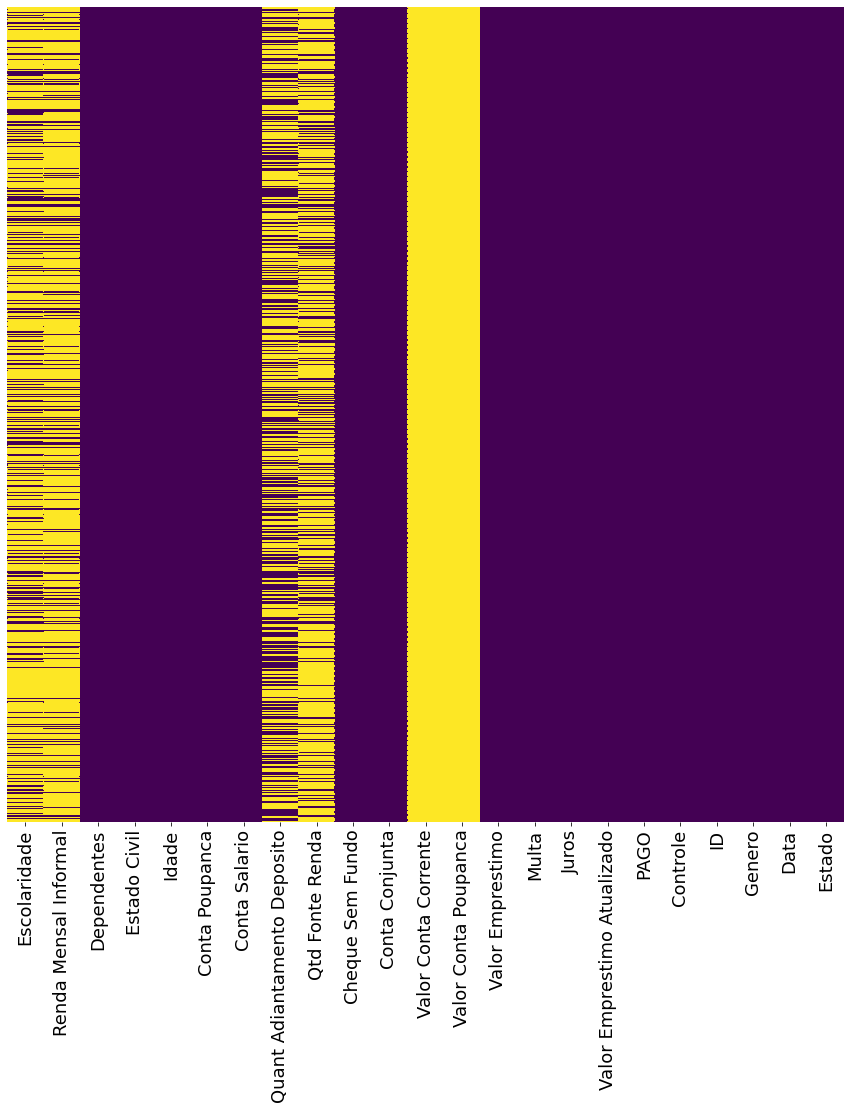

In [49]:
#Plotamos os valores nulos para facilitar a visualização de sua distribuição na base
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null_viz.set_xticklabels(null_viz.get_xmajorticklabels(), fontsize = 18)

In [50]:
figure = null_viz.get_figure()    
figure.savefig('null.png', dpi=400)

In [51]:
# Para ter um olhar mais analítico utilizamos o percentual de valores nulos para as colunas
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing != 0]

Escolaridade                    70.996229
Renda Mensal Informal           80.615201
Quant Adiantamento Deposito     56.652114
Qtd Fonte Renda                 74.586227
Valor Conta Corrente           100.000000
Valor Conta Poupanca           100.000000
dtype: float64

In [52]:
# Copiamos a base de dados para iniciar a limpeza dos dados
df_clean = df.copy()

In [53]:
# A primeira modificação é a transformação das variáveis categóricas em numéricas
get_dummies_list = ["Dependentes","Conta Poupanca","Conta Salario","Cheque Sem Fundo","Conta Conjunta"]

for item in get_dummies_list:
    df_clean[item] = pd.get_dummies(df_clean[item], drop_first = True)

df_clean[get_dummies_list].head()

,Dependentes,Conta Poupanca,Conta Salario,Cheque Sem Fundo,Conta Conjunta
0,1,1,0,0,0
1,0,1,0,1,0
2,1,1,0,1,0
3,0,0,0,0,0
4,1,1,0,0,0


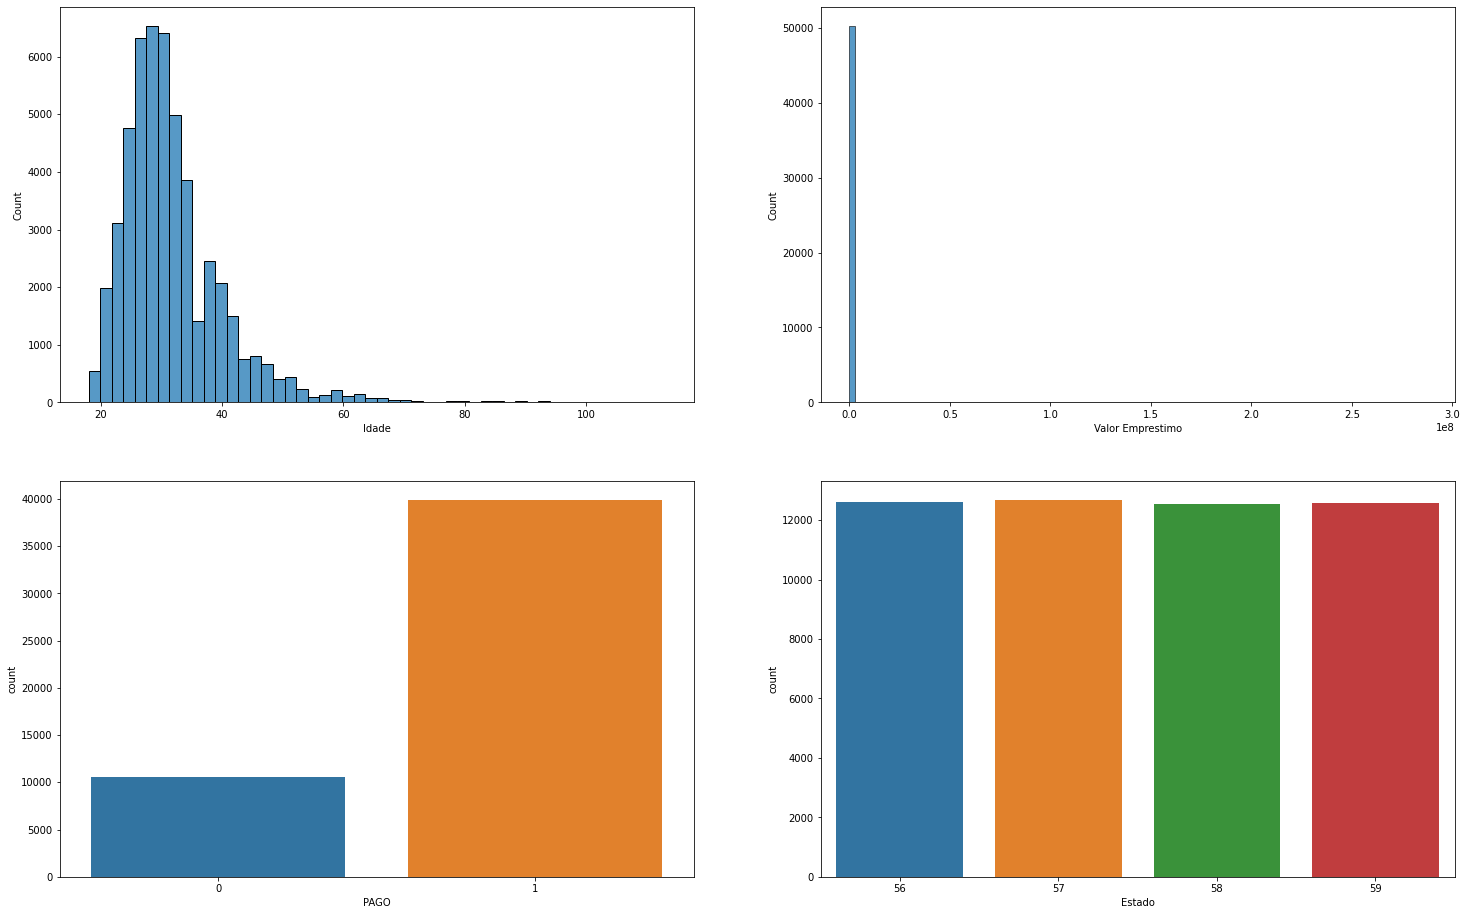

In [54]:
# Observamos as distribuições de algumas variáveis possivelmente importantes para entender melhor as informações da base
fig, axs = plt.subplots(ncols = 2, nrows= 2)
fig.set_figheight(16)
fig.set_figwidth(25)
sns.histplot(df_clean["Idade"].dropna(),bins = 50,ax = axs[0][0])
sns.histplot(df_clean["Valor Emprestimo"].dropna(),bins = 100,ax = axs[0][1])
sns.countplot(x = df_clean["PAGO"].dropna(),ax = axs[1][0])
sns.countplot(x = df_clean["Estado"].dropna(),ax = axs[1][1])

[Text(0, 0.5, 'Escolaridade'),
 Text(0, 1.5, 'Renda Mensal Informal'),
 Text(0, 2.5, 'Dependentes'),
 Text(0, 3.5, 'Estado Civil'),
 Text(0, 4.5, 'Idade'),
 Text(0, 5.5, 'Conta Poupanca'),
 Text(0, 6.5, 'Conta Salario'),
 Text(0, 7.5, 'Quant Adiantamento Deposito'),
 Text(0, 8.5, 'Qtd Fonte Renda'),
 Text(0, 9.5, 'Cheque Sem Fundo'),
 Text(0, 10.5, 'Conta Conjunta'),
 Text(0, 11.5, 'Valor Emprestimo'),
 Text(0, 12.5, 'Multa'),
 Text(0, 13.5, 'Juros'),
 Text(0, 14.5, 'Valor Emprestimo Atualizado'),
 Text(0, 15.5, 'PAGO'),
 Text(0, 16.5, 'ID'),
 Text(0, 17.5, 'Genero'),
 Text(0, 18.5, 'Estado')]

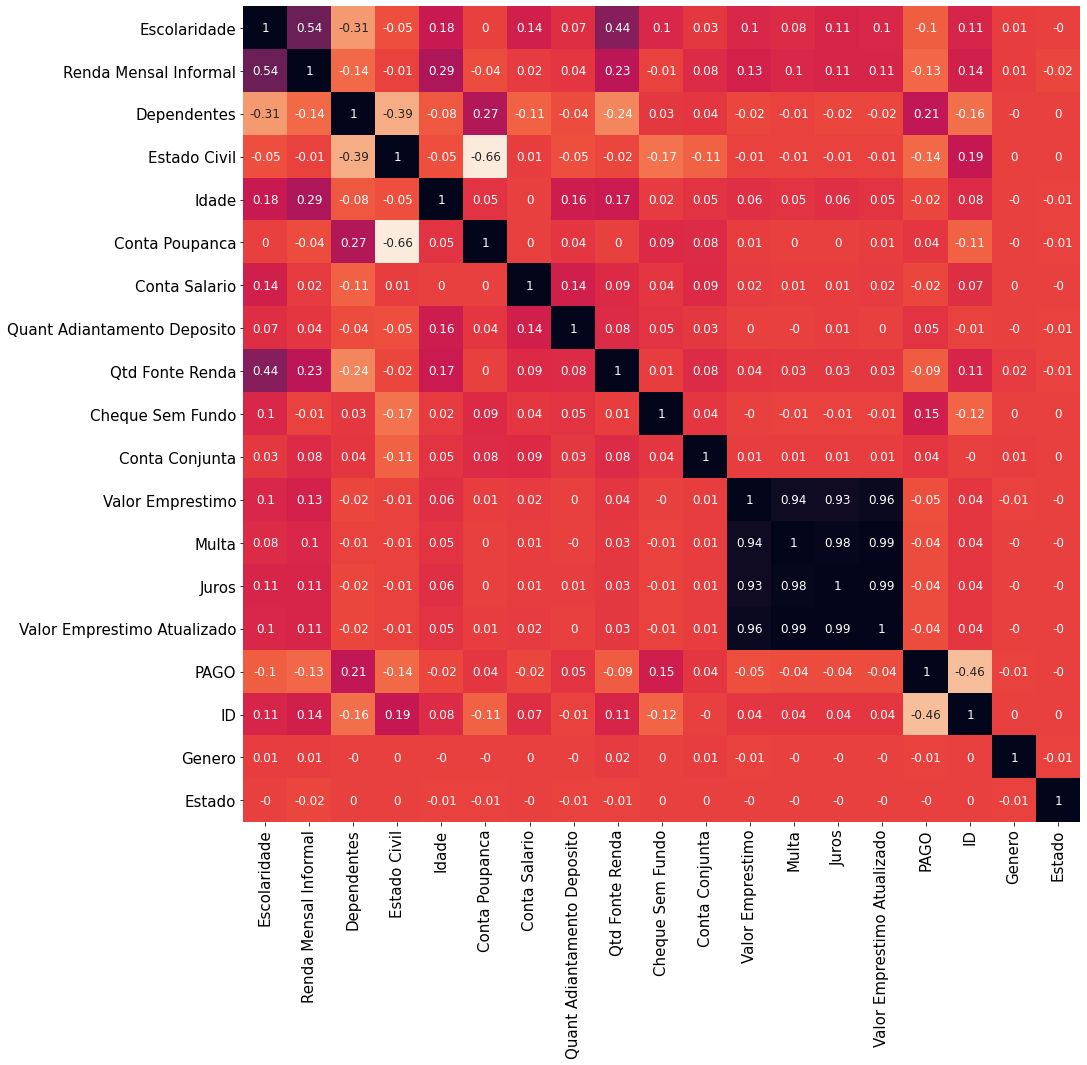

In [55]:
# Iniciamos o estudo das variáveis com um mapa de calor da correlação das variáveis da base
plt.figure(figsize=(15,15))
corr_map = sns.heatmap(round(df_clean.drop(columns = ["Valor Conta Corrente","Valor Conta Poupanca","Controle"]).corr(),2),cmap = "rocket_r",annot= True,cbar = False ,annot_kws={"fontsize":12})
corr_map.set_xticklabels(corr_map.get_xmajorticklabels(), fontsize = 15)
corr_map.set_yticklabels(corr_map.get_ymajorticklabels(), fontsize = 15)

In [56]:
# Elencamos o valor absoluto da correlação dos dados da base com a variável a ser predita
df_clean.corr()["PAGO"].abs().sort_values(ascending=False)

PAGO                           1.000000
ID                             0.458284
Dependentes                    0.206950
Cheque Sem Fundo               0.154657
Estado Civil                   0.143398
Renda Mensal Informal          0.131826
Escolaridade                   0.098572
Qtd Fonte Renda                0.085403
Quant Adiantamento Deposito    0.054287
Valor Emprestimo               0.045821
Conta Conjunta                 0.040406
Valor Emprestimo Atualizado    0.038874
Juros                          0.037139
Multa                          0.037019
Conta Poupanca                 0.035233
Conta Salario                  0.024361
Idade                          0.021859
Genero                         0.006936
Estado                         0.003797
Valor Conta Corrente                NaN
Valor Conta Poupanca                NaN
Controle                            NaN
Name: PAGO, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


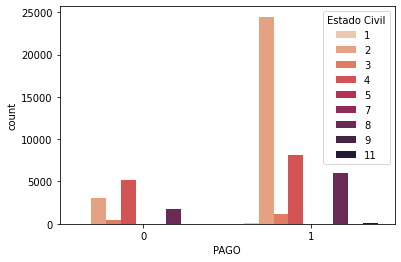

In [57]:
# Como o estado civil é uma variável alta na lista da correlação mas sem uma relação de negócio lógicamente estabelecida, portanto analisamos a distribuição dela com relação à variável objetivo
sns.countplot(df_clean["PAGO"], hue=df_clean["Estado Civil"],palette='rocket_r')

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

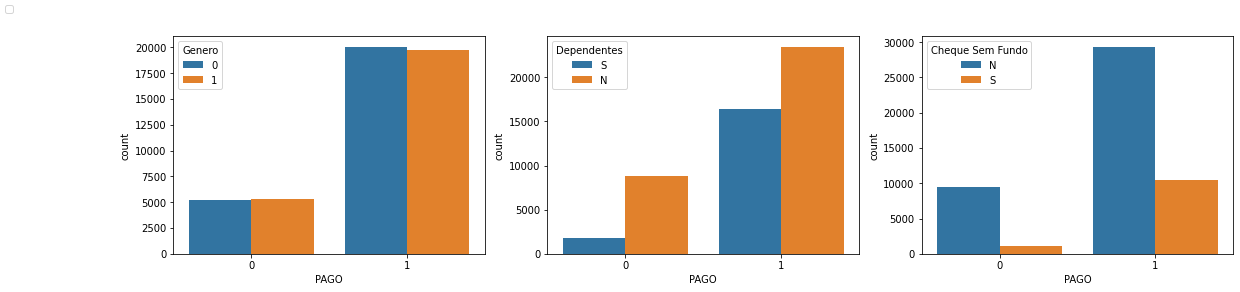

In [58]:
# Analisamos a distribuição de algumas variáveis categóricas com relação à variável objetivo
fig, axs = plt.subplots(ncols = 3)
fig.set_figwidth(19)
fig.legend(loc = 'upper left')
sns.countplot(df["PAGO"], hue=df["Genero"],ax = axs[0])
sns.countplot(df["PAGO"], hue=df["Dependentes"],ax = axs[1])
sns.countplot(df["PAGO"], hue=df["Cheque Sem Fundo"],ax = axs[2])


In [59]:
# Observando a descrição estatística em busca de possíveis outliers
df_clean.describe()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,21843.000000,12806.000000,50390.000000,50390.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,0.360032,3.503354,31.724529,0.847986,0.023397,2.104931,1.241605,0.230026,0.041715,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,0.480014,2.132091,8.565117,0.359038,0.151164,0.898459,0.496176,0.420853,0.199938,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,0.000000,1.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,0.000000,2.000000,26.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,0.000000,2.000000,30.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,1.000000,4.000000,35.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,1.000000,11.000000,113.000000,1.000000,1.000000,18.000000,3.000000,1.000000,1.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


In [60]:
# Identificamos algumas colunas com relevância de negócio com valores muito acima da faixa de 75%
possible_outliers = ['Renda Mensal Informal', 'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado']
df_clean[possible_outliers].describe()

,Renda Mensal Informal,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado
count,9768.000000,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04
mean,4635.610641,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05
std,24776.361024,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06
min,0.009600,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03
25%,28.173400,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03
50%,186.004900,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03
75%,1159.021800,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04
max,516960.779100,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09


No handles with labels found to put in legend.


[Text(0, 0, '0')]

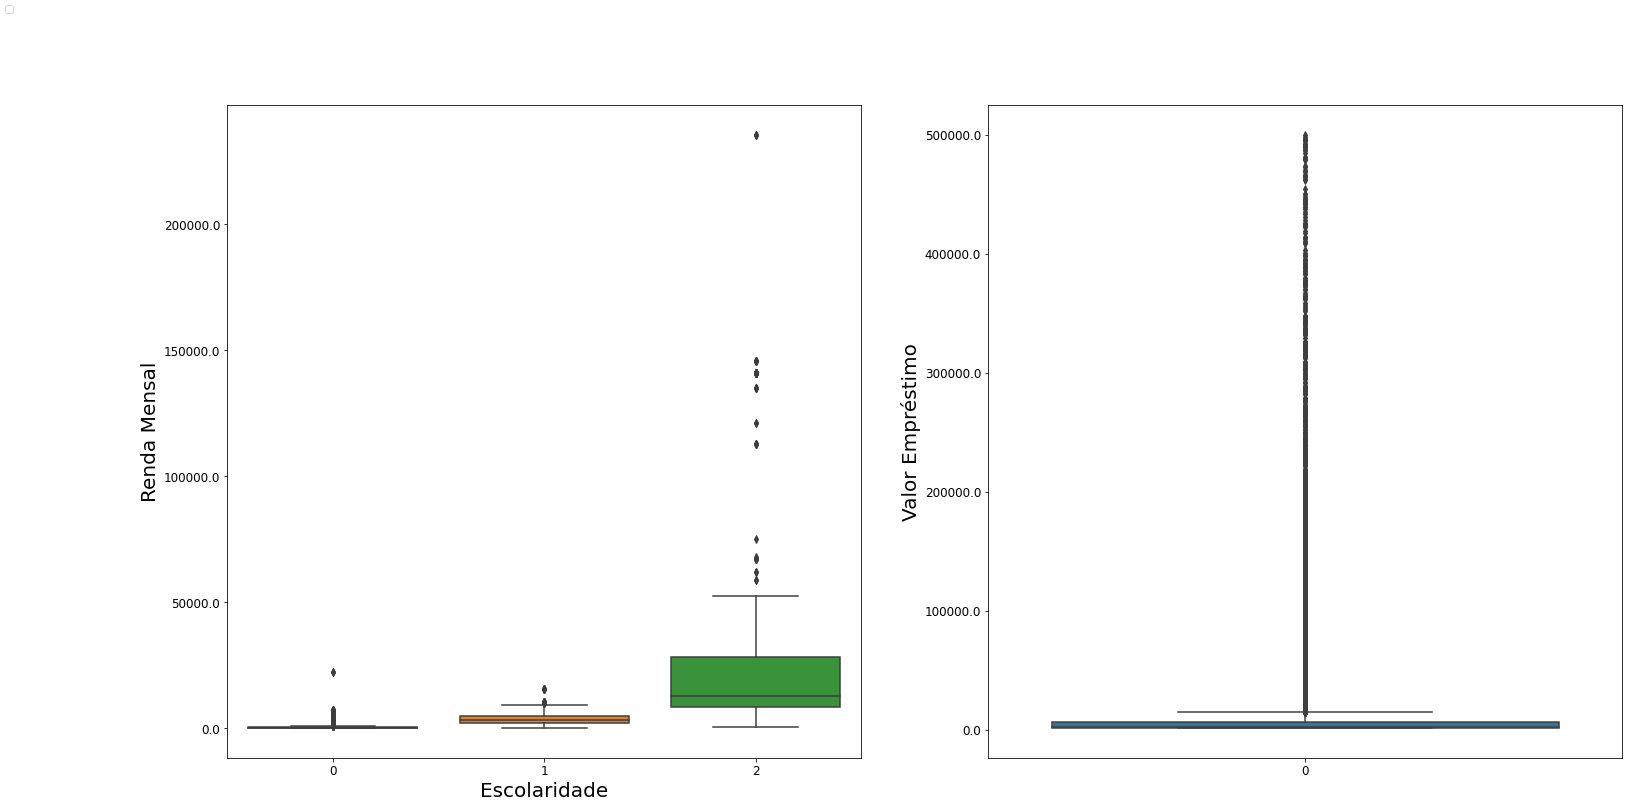

In [61]:
# Plotamos os quartis e confirmamos a presença de outliers nas variáveis
fig, axs = plt.subplots(ncols = 2, nrows= 1)
fig.set_figwidth(25)
fig.set_figheight(12)
fig.legend(loc = 'upper left')
renda_mensal = sns.boxplot(y=df_clean["Renda Mensal Informal"],x = df_clean['Escolaridade'],ax = axs[0])
valor_emprestimo = sns.boxplot(y=df_clean["Valor Emprestimo"].loc[df_clean["Valor Emprestimo"]<500000],ax = axs[1])
renda_mensal.set_ylabel('Renda Mensal', fontsize = 20)
valor_emprestimo.set_ylabel('Valor Empréstimo', fontsize = 20)
renda_mensal.set_yticklabels(renda_mensal.get_yticks(),fontsize = 12)
valor_emprestimo.set_yticklabels(valor_emprestimo.get_yticks(),fontsize = 12)
renda_mensal.set_xlabel('Escolaridade', fontsize = 20)
#valor_emprestimo.set_xlabel('Escolaridade', fontsize = 20)
renda_mensal.set_xticklabels(renda_mensal.get_xticks(),fontsize = 12)
valor_emprestimo.set_xticklabels(valor_emprestimo.get_xticks(),fontsize = 12)

No handles with labels found to put in legend.


[Text(0, 0, '0')]

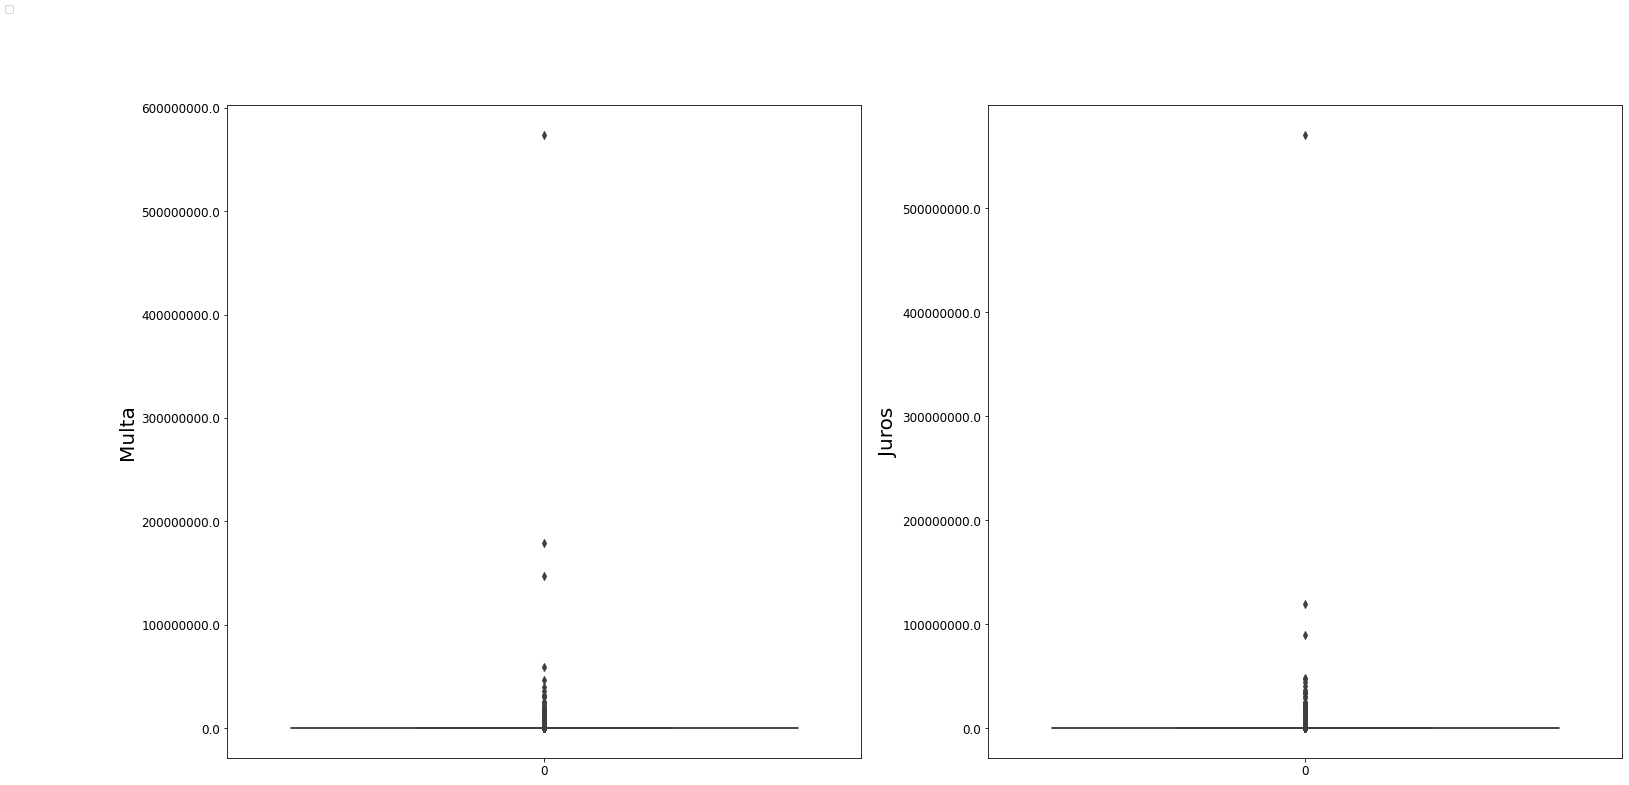

In [62]:
fig, axs = plt.subplots(ncols = 2, nrows= 1)
fig.set_figwidth(25)
fig.set_figheight(12)
fig.legend(loc = 'upper left')
renda_mensal = sns.boxplot(y=df_clean["Multa"],ax = axs[0])
valor_emprestimo = sns.boxplot(y=df_clean["Juros"],ax = axs[1])
renda_mensal.set_ylabel('Multa', fontsize = 20)
valor_emprestimo.set_ylabel('Juros', fontsize = 20)
renda_mensal.set_yticklabels(renda_mensal.get_yticks(),fontsize = 12)
valor_emprestimo.set_yticklabels(valor_emprestimo.get_yticks(),fontsize = 12)
#renda_mensal.set_xlabel('Escolaridade', fontsize = 20)
#valor_emprestimo.set_xlabel('Escolaridade', fontsize = 20)
renda_mensal.set_xticklabels(renda_mensal.get_xticks(),fontsize = 12)
valor_emprestimo.set_xticklabels(valor_emprestimo.get_xticks(),fontsize = 12)

No handles with labels found to put in legend.


[Text(0, 0, '-50000000.0'),
 Text(0, 0, '0.0'),
 Text(0, 0, '50000000.0'),
 Text(0, 0, '100000000.0'),
 Text(0, 0, '150000000.0'),
 Text(0, 0, '200000000.0'),
 Text(0, 0, '250000000.0'),
 Text(0, 0, '300000000.0'),
 Text(0, 0, '350000000.0')]

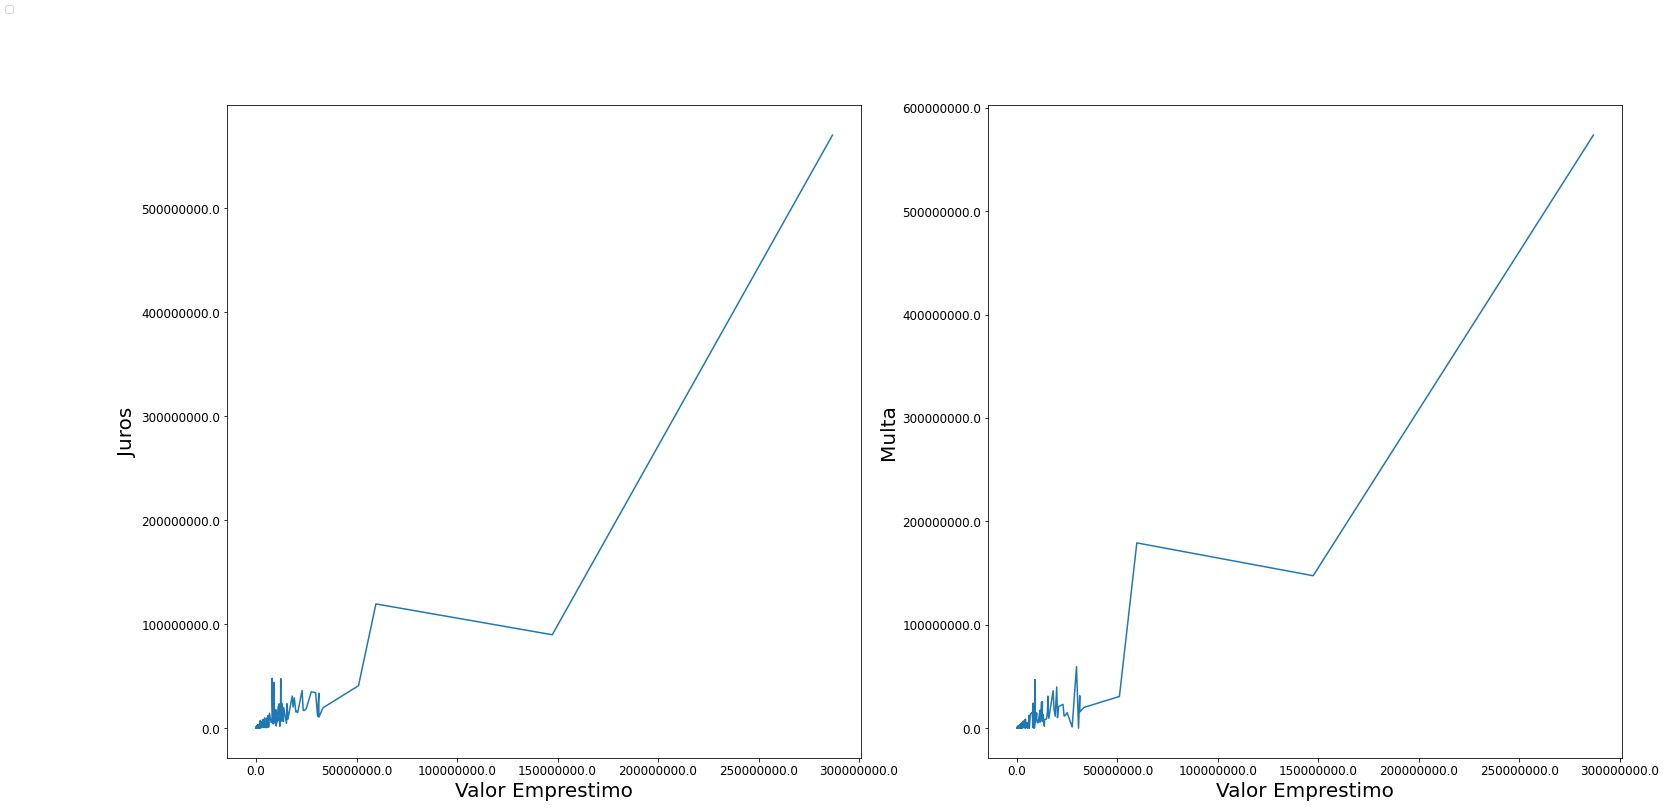

In [63]:
# Plotamos os quartis e confirmamos a presença de outliers nas variáveis
fig, axs = plt.subplots(ncols = 2, nrows= 1)
fig.set_figwidth(25)
fig.set_figheight(12)
fig.legend(loc = 'upper left')
renda_mensal = sns.lineplot(y=df_clean["Juros"],x = df_clean['Valor Emprestimo'],ax = axs[0])
valor_emprestimo = sns.lineplot(y=df_clean["Multa"], x = df_clean['Valor Emprestimo'],ax = axs[1])
renda_mensal.set_ylabel('Juros', fontsize = 20)
valor_emprestimo.set_ylabel('Multa', fontsize = 20)
renda_mensal.set_yticklabels(renda_mensal.get_yticks(),fontsize = 12)
valor_emprestimo.set_yticklabels(valor_emprestimo.get_yticks(),fontsize = 12)
renda_mensal.set_xlabel('Valor Emprestimo', fontsize = 20)
valor_emprestimo.set_xlabel('Valor Emprestimo', fontsize = 20)
renda_mensal.set_xticklabels(renda_mensal.get_xticks(),fontsize = 12)
valor_emprestimo.set_xticklabels(valor_emprestimo.get_xticks(),fontsize = 12)

In [64]:
# Determinamos os limites para o corte e retiramos os outliers sem afetar muito a quantidade de dados disponíveis (>90%)
(df_clean['ID'].loc[df_clean["Valor Emprestimo"]>40000].count()/len(df_clean))*100

7.408215915856322

In [65]:
(df_clean['ID'].loc[df_clean["Multa"]>40000].count()/len(df_clean))*100

6.85255010914864

In [66]:
(df_clean['ID'].loc[df_clean["Juros"]>40000].count()/len(df_clean))*100

8.176225441555864

In [67]:
#Realizamos a retirada dos outliers e observamos o impacto na base
#Esta etapa está comentada para histórico, pois em teste foi observada que o comportamento natural dos dados melhorou a performance do modelo
#df_clean.drop(df_clean.loc[df_clean['Valor Emprestimo']>40000].index,inplace = True)
#df_clean.drop(df_clean.loc[df_clean['Renda Mensal Informal']>50000].index,inplace = True)
#df_clean.drop(df_clean.loc[df_clean['Multa']>40000].index,inplace = True)
#df_clean.drop(df_clean.loc[df_clean['Juros']>40000].index,inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  uint8  
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  uint8  
 6   Conta Salario                50390 non-null  uint8  
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  uint8  
 10  Conta Conjunta               50390 non-null  uint8  
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [68]:
df_clean[possible_outliers].describe()

,Renda Mensal Informal,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado
count,9768.000000,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04
mean,4635.610641,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05
std,24776.361024,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06
min,0.009600,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03
25%,28.173400,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03
50%,186.004900,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03
75%,1159.021800,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04
max,516960.779100,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09


A etapa a seguir foi uma tentativa de preencher os valores nulos nas colunas de escolaridade e renda mensal informal (dada a alta correlação entra as duas variáveis), no entanto como a quantidade de inputs nulos em ambas as colunas simultaneamente permitiu o preenchimento de uma parte dos valores, mas ainda deixando 70% das linhas com valores nulos.


---

Para se obter os dados faltantes para essas colunas seria necessário um algoritmo de regressão para estimar os valores com base nas outras variáveis

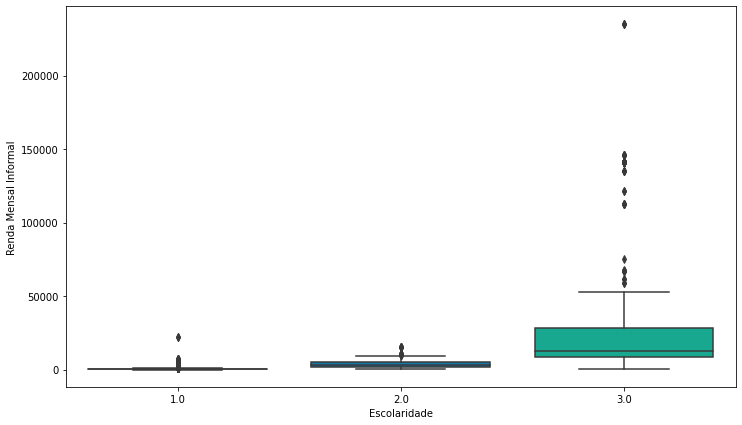

In [69]:
#Observamos a correlação da escolaridade com a distribuição de renda
plt.figure(figsize=(12, 7))
sns.boxplot(y='Renda Mensal Informal',x='Escolaridade',data=df_clean,palette='winter')

In [70]:
# Observamos a distribuição em busca de valores médios para preencher os dados nulos
df_clean.groupby("Escolaridade")["Renda Mensal Informal"].describe()

,count,mean,std,min,25%,50%,75%,max
Escolaridade,,,,,,,,
1.0,7884.0,384.474806,771.281934,0.0096,19.8589,100.9050,418.4725,22176.0000
2.0,833.0,3617.286889,2500.949018,28.7135,1908.9126,3278.8761,5002.8855,15579.6637
3.0,821.0,24570.132874,32623.105442,260.2578,8488.7885,12895.8250,28185.0721,235367.3922


In [71]:
# Aqui nos deparamos com o problema em que a quantidade de valores nulos simultâneos são a maioria da base
df.isnull().groupby(['Escolaridade','Renda Mensal Informal']).size()

Escolaridade  Renda Mensal Informal
False         False                     9538
              True                      5077
True          False                      230
              True                     35545
dtype: int64

In [72]:
# Definimos as funções de preenchimento de ambas as colunas com base no valor da outra
def impute_renda(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Renda):

        if Escol == 1.0:
            return 390

        elif Escol == 2.0:
            return 4000

        elif Escol == 3.0:
            return 25000

        else:
            return np.nan

    else:
        return Renda

def impute_escol(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Escol):

        if Renda > 1 and Renda <= 500:
            return 1

        elif Renda > 500 and Renda <= 5000:
            return 2

        elif Renda > 5000 :
            return 3

        else:
            return np.NaN

    else:
        return Escol

In [73]:
# Aplicamos as funções nas respectivas colunas
df_clean['Renda Mensal Informal'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_renda,axis=1)
df_clean['Escolaridade'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_escol,axis=1)

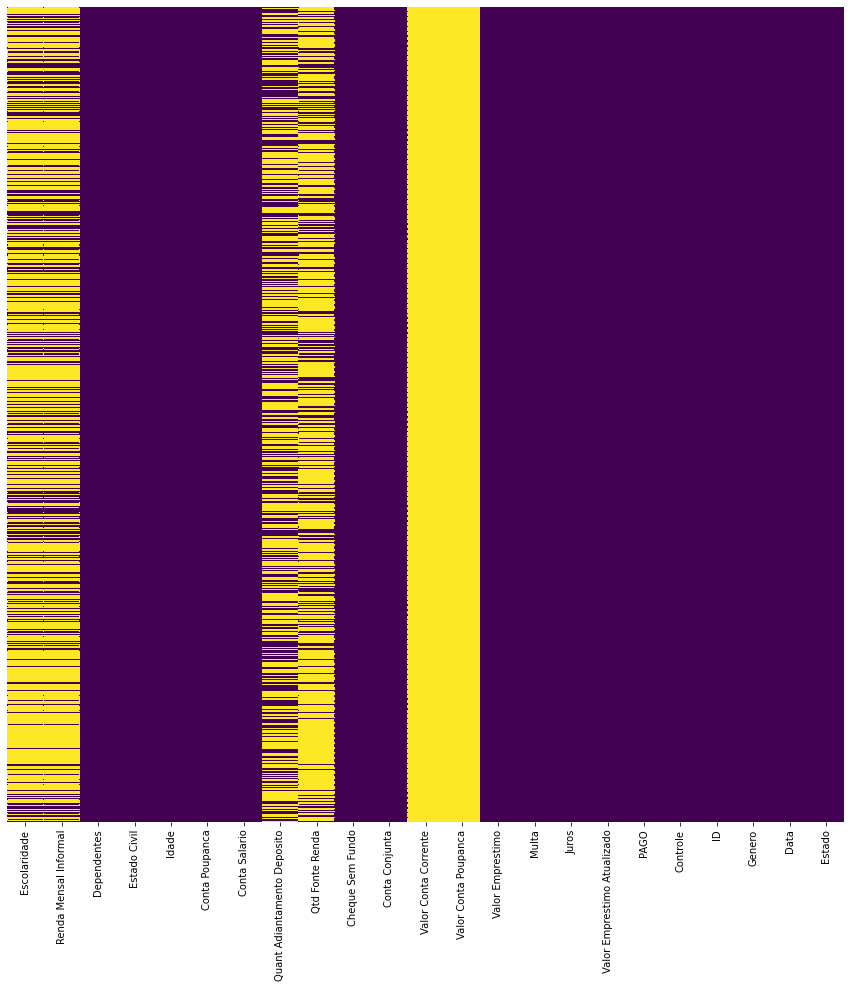

In [74]:
# Plotamos as mudanças ocorridas
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
# Notamos que reduzimos o valor de nulos, no entanto ainda temos uma quantidade considerável de valores nulos
percent_missing = df_clean.isnull().sum() * 100 / len(df)
percent_missing

Escolaridade                    70.593372
Renda Mensal Informal           70.539790
Dependentes                      0.000000
Estado Civil                     0.000000
Idade                            0.000000
Conta Poupanca                   0.000000
Conta Salario                    0.000000
Quant Adiantamento Deposito     56.652114
Qtd Fonte Renda                 74.586227
Cheque Sem Fundo                 0.000000
Conta Conjunta                   0.000000
Valor Conta Corrente           100.000000
Valor Conta Poupanca           100.000000
Valor Emprestimo                 0.000000
Multa                            0.000000
Juros                            0.000000
Valor Emprestimo Atualizado      0.000000
PAGO                             0.000000
Controle                         0.000000
ID                               0.000000
Genero                           0.000000
Data                             0.000000
Estado                           0.000000
dtype: float64

# Modelo

Nesta seção modelamos uma Floresta Aleatória simples para avaliar a efetividade das escolhas de variáveis e limpeza dos dados feita anteriormente 

In [76]:
df_clean.columns

Index(['Escolaridade', 'Renda Mensal Informal', 'Dependentes', 'Estado Civil',
       'Idade', 'Conta Poupanca', 'Conta Salario',
       'Quant Adiantamento Deposito', 'Qtd Fonte Renda', 'Cheque Sem Fundo',
       'Conta Conjunta', 'Valor Conta Corrente', 'Valor Conta Poupanca',
       'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado',
       'PAGO', 'Controle', 'ID', 'Genero', 'Data', 'Estado'],
      dtype='object')

In [77]:
# Criamos um dataframe auxiliar para salvar as colunas que serão incluidas no modelo
df_cleanv2 = df_clean[['Dependentes','Estado Civil','Idade','Conta Poupanca', 'Conta Salario',
                       'Cheque Sem Fundo','Conta Conjunta','Valor Emprestimo','Multa','Juros','PAGO']].dropna()
df_cleanv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 0 to 50389
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependentes       50390 non-null  uint8  
 1   Estado Civil      50390 non-null  int64  
 2   Idade             50390 non-null  int64  
 3   Conta Poupanca    50390 non-null  uint8  
 4   Conta Salario     50390 non-null  uint8  
 5   Cheque Sem Fundo  50390 non-null  uint8  
 6   Conta Conjunta    50390 non-null  uint8  
 7   Valor Emprestimo  50390 non-null  float64
 8   Multa             50390 non-null  float64
 9   Juros             50390 non-null  float64
 10  PAGO              50390 non-null  int64  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 2.9 MB


In [78]:
#Separamos os dados entre regressores e resultados e notamos que temos um desbalanceamento nos resultados
X = df_cleanv2.drop(columns = ['PAGO'])
y = df_cleanv2['PAGO']
y.value_counts()

1    39853
0    10537
Name: PAGO, dtype: int64

In [79]:
# Criamos as bases de treino e teste 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [80]:
# Treinamos o modelo
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
# Realizamos a predição
rfc_pred = rfc.predict(X_test)

In [82]:
# Observarmos a matriz confusão e as métricas do modelo e notamos o impacto da base desbalanceada possivelmente criando um viés no modelo
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[ 1802  1322]
 [  701 11292]]


In [83]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64      3124
           1       0.90      0.94      0.92     11993

    accuracy                           0.87     15117
   macro avg       0.81      0.76      0.78     15117
weighted avg       0.86      0.87      0.86     15117



In [84]:
rfc.score(X_test,y_test)

0.8661771515512338

In [85]:
# Além da classificação o modelo também nos dá a probabilidade de um indivíduo pagar ou não o empréstimo, o que pode ser usado como input no cálculo de multas e juros 
probabilities = pd.DataFrame(data = rfc.predict_proba(X_test), columns = ["Não Pago","Pago"])
probabilities

,Não Pago,Pago
0,0.280,0.720
1,0.094,0.906
2,0.288,0.712
3,0.006,0.994
4,0.070,0.930
...,...,...
15112,0.446,0.554
15113,0.974,0.026
15114,0.802,0.198
15115,0.012,0.988


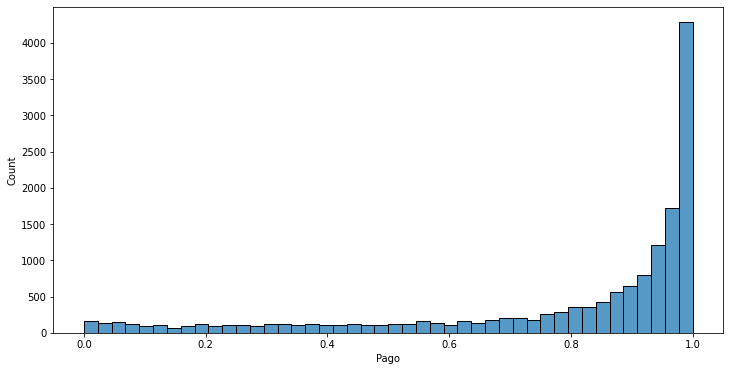

In [86]:
plt.figure(figsize = (12,6))
prob_pago = sns.histplot(x = "Pago",data = probabilities)